In [43]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [44]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [45]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)


(100, 6)


In [46]:
#function for row sampling

def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]), replace=True)

In [55]:
#function for feature sampling

def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*df.shape[1]-1))
    new_df= df[cols]
    new_df['target'] = df['target']
    return new_df

In [48]:
#function for combined sampling

def combined_sampling(df,row_percent,col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df, col_percent)

In [99]:
df1 = sample_rows(df,0.1)

In [100]:
df2 = sample_rows(df,0.1)

In [101]:
df3 = sample_rows(df,0.1)

In [102]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [103]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df3.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [104]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[4] <= -0.436\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= -0.051\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

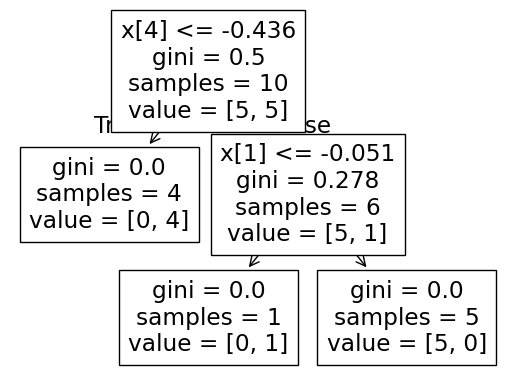

In [105]:
plot_tree(clf1)

[Text(0.6666666666666666, 0.9, 'x[4] <= 0.398\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.5, 0.7, 'x[3] <= 1.905\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.5833333333333333, 0.8, 'True  '),
 Text(0.3333333333333333, 0.5, 'x[0] <= -0.068\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.3, 'x[3] <= 0.882\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.8, '  False')]

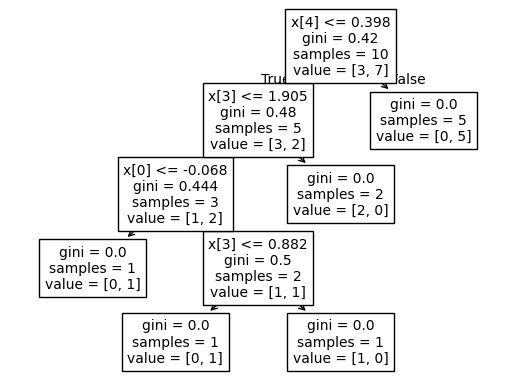

In [106]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[4] <= 0.123\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.625, 0.5, '  False')]

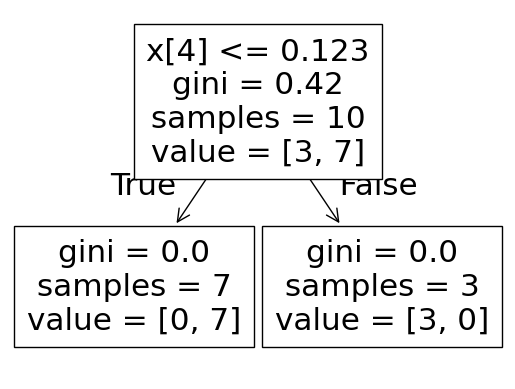

In [107]:
plot_tree(clf3)

In [108]:
df1.head(4)

,col1,col2,col3,col4,col5,target
22,1.714947,1.408047,-0.573084,0.001745,1.532001,0
88,0.047650,1.130495,0.528863,1.767040,0.347834,0
15,1.358872,1.211216,-1.432717,1.110946,-1.012776,1
1,0.296426,0.757611,1.112877,1.724132,0.672567,0


In [109]:
# df3.head()
df1.head()

,col1,col2,col3,col4,col5,target
22,1.714947,1.408047,-0.573084,0.001745,1.532001,0
88,0.047650,1.130495,0.528863,1.767040,0.347834,0
15,1.358872,1.211216,-1.432717,1.110946,-1.012776,1
1,0.296426,0.757611,1.112877,1.724132,0.672567,0
0,1.135745,0.780363,-1.698492,1.452762,-1.256538,1


In [111]:
clf1.predict(np.array([1.714947,1.408047,-0.573084,0.001745,1.532001]).reshape(1,5))

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [112]:
clf2.predict(np.array([1.714947,1.408047,-0.573084,0.001745,1.532001]).reshape(1,5))

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [113]:
clf3.predict(np.array([1.714947,1.408047,-0.573084,0.001745,1.532001]).reshape(1,5))

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
#therefore op of prediction will be 0 which is correct according to majority vote